# Python Plots

In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from datetime import datetime as dt

In [3]:
df = pd.read_csv("unemployement-rate-1948-2010.csv")

In [4]:
df

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5
...,...,...,...,...
741,LNS14000000,2009,M10,10.1
742,LNS14000000,2009,M11,10.0
743,LNS14000000,2009,M12,10.0
744,LNS14000000,2010,M01,9.7


In [5]:
df1 = pd.read_csv("expenditures.txt", sep = '\t', header=0)

In [6]:
df1

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1
...,...,...,...,...
345,1984,Education,303,1
346,1984,Tobacco Products,228,1
347,1984,Miscellaneous,451,1
348,1984,Cash Contributions,706,1


In [7]:
# Calculate total expenditure for categories
expend_cat = df1.groupby(['category'])['expenditure'].sum().reset_index()

# Calculate total expenditure by year
expend_year = df1.groupby(['year'])['expenditure'].sum().reset_index()

## Python- Tree Map

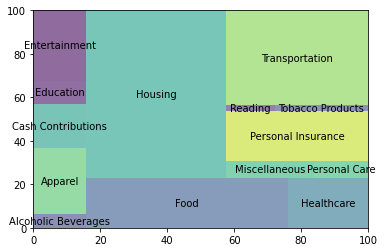

In [8]:
squarify.plot(sizes=expend_cat['expenditure'], label=expend_cat['category'], alpha=0.6) 
plt.axis('on') 
plt.show() 

## Python-Area chart

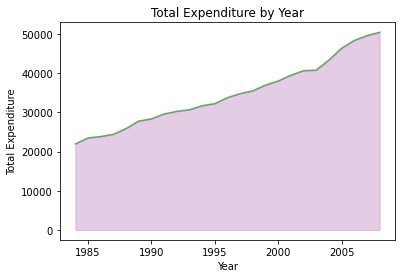

In [9]:
a = expend_year['year']
b = expend_year['expenditure']
plt.fill_between( a, b, color='purple', alpha=0.2)
plt.title('Total Expenditure by Year')
plt.xlabel('Year')
plt.ylabel('Total Expenditure')
plt.plot(a, b, color='green', alpha=0.6)

## Python- Stacked Area chart

IndexError: index 3 is out of bounds for axis 0 with size 3

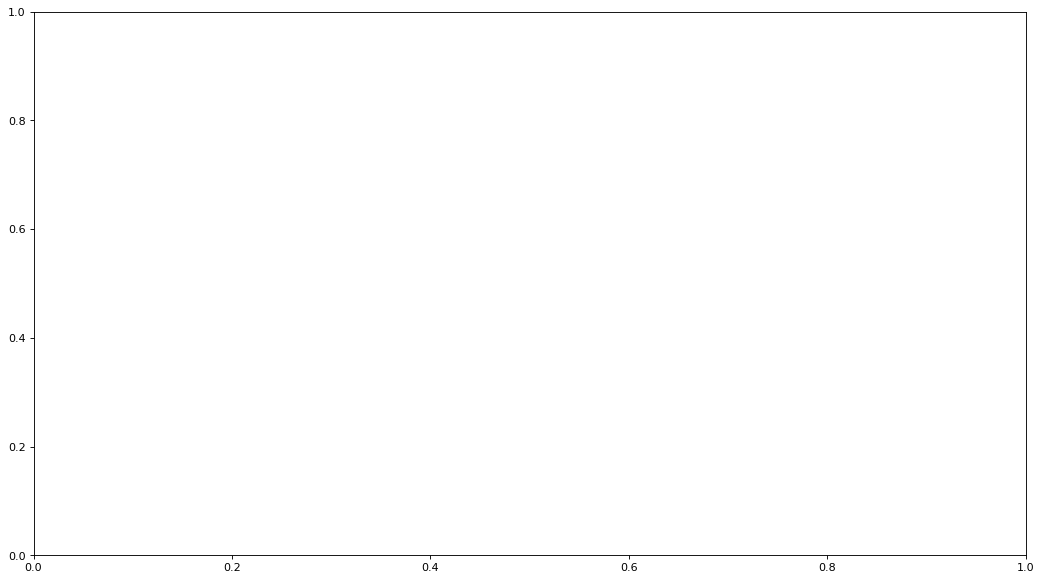

In [10]:
plt_expenditures = df1.loc[:, df1.columns != 'sex'].pivot(index='year', columns='category', values='expenditure')
plt_expenditures.reset_index(level=0, inplace=True)

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df1.columns[1:]
labs = df1.values.tolist()

# Prepare data
x  = df1['year'].values.tolist()
y0 = df1[columns[0]].values.tolist()
y1 = df1[columns[1]].values.tolist()
y2 = df1[columns[2]].values.tolist()
y3 = df1[columns[3]].values.tolist()
y4 = df1[columns[4]].values.tolist()
y5 = df1[columns[5]].values.tolist()
y6 = df1[columns[6]].values.tolist()
y7 = df1[columns[7]].values.tolist()
y8 = df1[columns[8]].values.tolist()
y9 = df1[columns[9]].values.tolist()
y10 = df1[columns[10]].values.tolist()
y11 = df1[columns[11]].values.tolist()
y12 = df1[columns[12]].values.tolist()

y = np.vstack([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, alpha=0.8)

# Create title
ax.set_title('Total Expenditure by Year for each Category', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Total Expenditure')

# Show legend
ax.legend(fontsize=10, ncol=1, loc = 'upper left')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

# Output graph
plt.show()